In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\New Notebook\Notes\ML\data\Algerian_forest_fires_UPDATE.csv")


In [4]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0


In [5]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [6]:
## Independent And dependent features
y=df['FWI']
X=df.drop('FWI',axis=1)


In [7]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [8]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [9]:
from sklearn.model_selection import  train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
X_train.shape,y_train.shape

((182, 11), (182,))

In [11]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


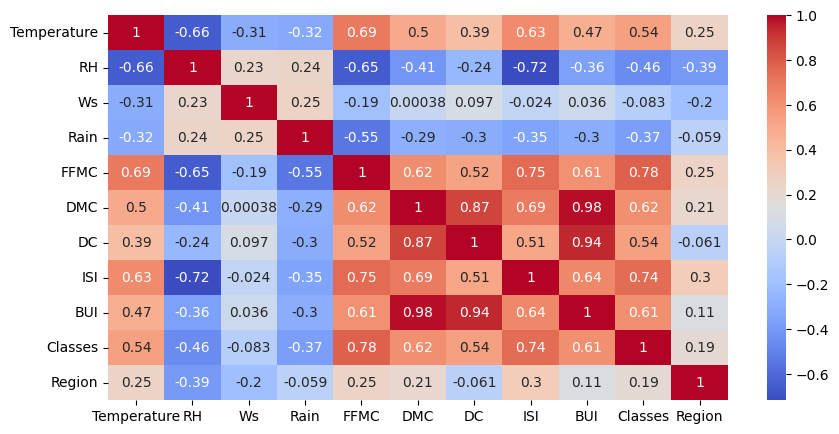

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(X_train.corr(),annot=True,cmap='coolwarm')
plt.show()

In [13]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
                

In [14]:
corr=correlation(X_train,0.85)

In [15]:
X_train.drop(corr,inplace=True,axis=1)
X_test.drop(corr,inplace=True,axis=1)
X_test.shape,X_train.shape

((61, 9), (182, 9))

In [16]:
np.array(X_train),np.array(y_train),np.array(X_test),np.array(y_test)

(array([[29. , 74. , 19. , ...,  2.1,  0. ,  0. ],
        [31. , 72. , 14. , ...,  0.8,  0. ,  1. ],
        [40. , 31. , 15. , ..., 16.6,  1. ,  1. ],
        ...,
        [25. , 76. , 17. , ...,  0.2,  0. ,  0. ],
        [34. , 59. , 16. , ...,  7.4,  1. ,  1. ],
        [30. , 77. , 21. , ...,  1.1,  0. ,  0. ]]),
 array([ 0.9,  0.3, 21.6,  2.6,  0.9,  9.9,  6.4, 10.5,  0. ,  7.7, 12.7,
        17.2, 12.9,  0.1,  0.7,  0.7,  2.5, 15.3,  0.1,  9.5,  5.7,  6.1,
         9.1, 31.1,  0.8,  0.3,  0.2,  6.8,  3.9,  3.4,  0.3,  1. ,  1. ,
         2.8,  0.5,  0.4, 18.8,  4.2,  0.9, 14.8, 12. , 16.1,  1.2, 15. ,
        13.7,  3. ,  0.8, 26.3,  0.5,  0.1, 14.6,  3.6,  0.2, 21.6,  6.7,
        16.3,  4.2, 20.3, 26.9, 19.4,  0.6,  3.2,  4.9,  0.9,  3.8,  4.1,
         0.4,  0.6,  7.1,  3. , 13.9,  0.3,  0.5,  0.2,  0.5,  0.4, 25.4,
         0.4,  0.8,  0.3,  6. ,  3.2, 13.5, 11.6, 12.6,  3.9,  0.5, 15. ,
         2.2,  0.2,  7.5, 14.5,  3.2, 18.4,  0.5, 16. ,  6. ,  0. , 19.5,
         0.8,

Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

In [18]:
X_train_sc

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

<Axes: title={'center': 'X_train After Scaling'}>

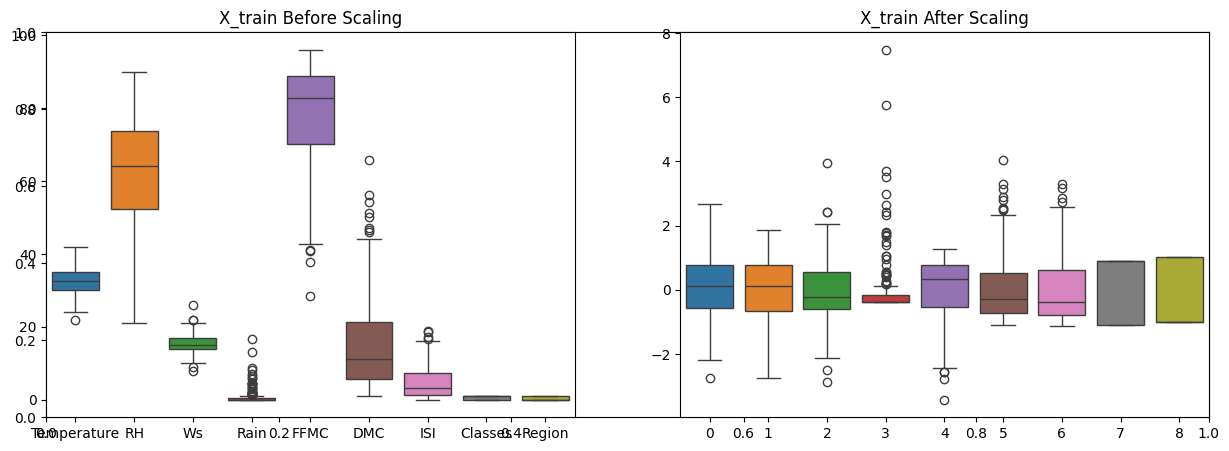

In [19]:
plt.subplots(figsize=(15,5))

plt.subplot(1,2,1)
plt.title("X_train Before Scaling")
sns.boxplot(data=X_train)
plt.subplot(1,2,2)
plt.title("X_train After Scaling")
sns.boxplot(data=X_train_sc)

Linear Regression Model

In [20]:
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import  r2_score


linearReg=LinearRegression()
linearReg.fit(X_train_sc,y_train)
y_pred=linearReg.predict(X_test_sc)
mae=mean_squared_error(y_test,y_pred)
print(mae)
R2=r2_score(y_test,y_pred)
print(R2)

0.6742766873791582
0.9847657384266951


In [21]:
from sklearn.linear_model import  Lasso
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import  r2_score


LassoReg=Lasso()
LassoReg.fit(X_train_sc,y_train)
y_pred=LassoReg.predict(X_test_sc)
mae=mean_squared_error(y_test,y_pred)
print(mae)
R2=r2_score(y_test,y_pred)
print(R2)

2.248345891897477
0.9492020263112388


In [22]:
from sklearn.linear_model import  Ridge
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import  r2_score


RidgeReg=Ridge()
RidgeReg.fit(X_train_sc,y_train)
y_pred=RidgeReg.predict(X_test_sc)
mae=mean_squared_error(y_test,y_pred)
print(mae)
R2=r2_score(y_test,y_pred)
print(R2)

0.6949198918152073
0.9842993364555513


In [23]:
from sklearn.linear_model import  ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  r2_score

ElasticNetReg=ElasticNet()
ElasticNetReg.fit(X_train_sc,y_train)
y_pred=ElasticNetReg.predict(X_test_sc)
mae=mean_squared_error(y_test,y_pred)
print(mae)
R2=r2_score(y_test,y_pred)
print(R2)

5.517251101025224
0.8753460589519703


In [24]:
import pickle 

pickle.dump(RidgeReg,open('..\models\Algerian_ff_Ridge_model.pkl','wb'))
pickle.dump(scaler,open('..\models\Algerian_ff_scaler.pkl','wb'))



In [ ]:
model=pickle.load(open(r'..\models\Algerian_ff_Ridge_model.pkl','rb'))
scaler=pickle.load(open(r'..\models\Algerian_ff_scaler.pkl','rb'))

In [ ]:
data=scaler.transform([[22,32,43,42,53,3,43,1,0]])

In [28]:
model.predict(data)

array([47.76514877])